In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.optimize import minimize_scalar
from scipy.optimize import linprog

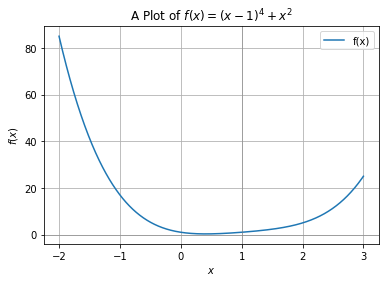

In [79]:
# Define the function f
f = lambda x : (x - 1)**4 + x**2

# Define the derivative of f
f_prime = lambda x : 4*(x - 1)**3 + 2*x

# Create an array of x values
x = np.linspace(-2, 3, 1000)

# Evaluate f and f' at each x value
y = f(x)
y_prime = f_prime(x)

# Find the minimum of f by finding where f' equals zero
x_min = 1.0
y_min = f(x_min)

# Plot f and f'
def print_a_function(f, values):
    fig, ax = plt.subplots()
    ax.plot(values, f(values), label='f(x)')
    ax.axhline(y=0, color='gray', linewidth=0.5) # Add a horizontal line at y=0
    ax.axvline(x=1, color='gray', linewidth=0.5) # Add a vertical line at x=x_min
    ax.legend()
    plt.title("A Plot of $f(x)=(x - 1)^4 + x^2$")
    plt.xlabel("$x$")
    plt.ylabel("$f(x)$")
    plt.grid()
    plt.show()

print_a_function(f,x)


In [80]:
f = lambda x : (x - 1)**4 + x**2
f_prime = lambda x : 4*(x - 1)**3 + 2*x

def find_root_newton_raphson(f, f_deriv, start, tol=1e-6, max_iter=1000):
    x0 = start # start value for the roots of the equation
    previous_x = x0 # The start value is  also the previous value.
    for i in np.arange(max_iter): # initiating a for loop with 1000 iterations
        try: # Using a try - execept block statement
        
            x0 -= f(x0)/ f_deriv(x0)  # Using Newton-Raphson Formular
            
        except (ValueError,ZeroDivisionError) :
            print("Derivative is zero")
        
        # Check if the difference between successive approximations falls below the tolerance level
        if abs(x0-previous_x) < tol:
            return x0
        
        previous_x = x0
        
    return previous_x
        
print(find_root_newton_raphson(f,f_prime,-2))

-0.09313953334509412


In [81]:
# Define the function f
f = lambda x : (x - 1)**4 + x**2
# Define the function f and its derivative f'
f = lambda x : (x - 1)**4 + x**2
f_prime = lambda x : 4*(x - 1)**3 + 2*x

# Define the bisection method function to find the root of a function
def find_root_bisection(f, a, b):
    fmin = f(a) # Finding the function of a in the function f.
    fmax = f(b) # Finding the function of b in the function f.
    
    if fmin * fmax > 0: # if the product of fmin and fmax does not produce a negative value,
        f_prime = lambda x : 4*(x - 1)**3 + 2*x
        find_root_newton_raphson(f, f_prime, 3) # call the newton raphson method on the function
    
    for i in np.arange(1000): # initiating a for loop with 1000 iterations.
        c = (a + b) / 2 # finding the midpoint of the lower boundry (a) and the upper boundry (b)
        
        fc = f(c) # finding the function of c the midpoint in the function f.
        
        if fc == 0 or abs(b - a) < 0.001: # if the computated value is 0 or the absolute value of the difference between b and a is less than 0.001.
            return c # returns c as the roots of the equation.
            
        elif fmin * fc < 0: # if the product between fmin and fc is less than zero,
            b = c # then the new upper boundry becomes the value of c.
        else:
            a = c # Else the opposite is the case.
            fmin = fc # the value of fmin becomes fc.
    
    return (a + b) / 2 # if after 1000 iterations, return the midpoint of the lower boundry (a) and the upper boundry (b)

roots = find_root_bisection(f, 0, 1)  
print(roots)

0.99951171875


In [82]:
# Find the root of f' using find_root
root_find_root_bisection = find_root_bisection(f_prime, -2, 2)
print("Root using find_root_bisection:", root_find_root_bisection)

# Find the root of f' using Brent's method
root_brentq = brentq(f_prime, -2, 2)
print("Root using Brent's method:", root_brentq)

Root using find_root_bisection: 0.41064453125
Root using Brent's method: 0.4102454876985416


x_min: 0.41, f(x_min): 0.29


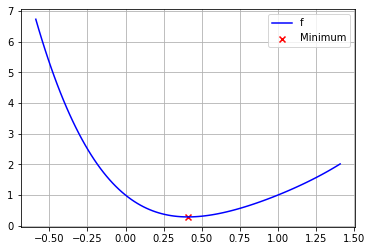

In [83]:
# Define the function f
f = lambda x : (x - 1)**4 + x**2

# Find the minimum of f using the Brent method
res = minimize_scalar(f, method='brent')

# Print the results
print('x_min: {:.02f}, f(x_min): {:.02f}'.format(res.x, res.fun))

# Plot the function
x = np.linspace(res.x - 1, res.x + 1, 100)
y = [f(val) for val in x]
plt.plot(x, y, color='blue', label='f')

# Plot the minimum
plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')

# Add grid and legend
plt.grid()
plt.legend(loc=1)
plt.show()



In [84]:
def gradient_descent(f, f_prime, start, learning_rate=0.1, eps=1e-6):
    x = start
    while True:
        grad = f_prime(x)
        x_new = x - learning_rate * grad
        if abs(x_new - x) < eps:
            return x_new
        x = x_new


f = lambda x : (x - 1) ** 4 + x ** 2
f_prime = lambda x : 4*((x-1)**3) + 2*x
start = -1
x_min = gradient_descent(f, f_prime, start, 0.01)
f_min = f(x_min)

print("xmin: 0.2f, f(x_min): 0.2f",  (x_min, f_min))


xmin: 0.2f, f(x_min): 0.2f (0.41023044092999633, 0.2892734246366677)


In [85]:
#INITIALISING A,b and c as numpy arrays

# Coefficients of the objective function
c = np.array([-1, -2])

# Coefficients of the constraints
A = np.array([[2, 1], [-4, 5], [1, -2]])
b = np.array([10, 8, 3])

In [86]:
# Using find_root to find the root of f prime
f_prime = 4*(x - 1)**3 + 2*x

# Define the function f and its derivative f'
f = lambda x : (x - 1)**4 + x**2
f_prime = lambda x : 4*(x - 1)**3 + 2*x

# Define the bisection method function to find the root of a function
def find_root_bisection(f, a, b):
    fmin = f(a) # Finding the function of a in the function f.
    fmax = f(b) # Finding the function of b in the function f.
    
    if fmin * fmax > 0: # if the product of fmin and fmax does not produce a negative value,
        f_prime = lambda x : 4*(x - 1)**3 + 2*x
        find_root_newton_raphson(f, f_prime, 3) # call the newton raphson method on the function
    
    for i in np.arange(1000): # initiating a for loop with 1000 iterations.
        c = (a + b) / 2 # finding the midpoint of the lower boundry (a) and the upper boundry (b)
        
        fc = f(c) # finding the function of c the midpoint in the function f.
        
        if fc == 0 or abs(b - a) < 0.001: # if the computated value is 0 or the absolute value of the difference between b and a is less than 0.001.
            return c # returns c as the roots of the equation.
            
        elif fmin * fc < 0: # if the product between fmin and fc is less than zero,
            b = c # then the new upper boundry becomes the value of c.
        else:
            a = c # Else the opposite is the case.
            fmin = fc # the value of fmin becomes fc.
    
    return (a + b) / 2 # if after 1000 iterations, return the midpoint of the lower boundry (a) and the upper boundry (b)

roots = find_root_bisection(f, 0, 1)  
print(roots)
print("The root of f is at x =", x_min)

0.99951171875
The root of f is at x = 0.41023044092999633


Root using Brent's method: 0.4102454876985416
x_min: 0.41, f(x_min): 0.29


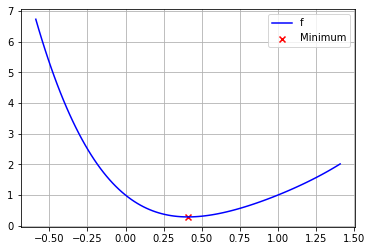

In [87]:
# Find the root of f' using Brent's method
root_brentq = brentq(f_prime, -2, 2)
print("Root using Brent's method:", root_brentq)

res = minimize_scalar(f, method='brent')
print('x_min: %.02f, f(x_min): %.02f' % (res.x, res.fun))

# plot curve
x = np.linspace(res.x - 1, res.x + 1, 100)
y = [f(val) for val in x]
plt.plot(x, y, color='blue', label='f')

# plot optima
plt.scatter(res.x, res.fun, color='red', marker='x', label='Minimum')

plt.grid()
plt.legend(loc = 1)
plt.show()


In [88]:
def solve_linear_problem(A, b, c):
    result = linprog(c = c, A_ub = A, b_ub = b, bounds=(0, None), method='simplex')
    return round(result.fun, 1), result.x

optimal_value, optimal_arg = solve_linear_problem(A, b, c)
print("The optimal value is:", optimal_value, "and is reached for x =", optimal_arg)


The optimal value is: -11.0 and is reached for x = [3. 4.]
